# Protocol for experiment 21 "Energy Distribution in the Spectrum"

<div style="padding:8px 0 8px 15px;border-left:3px solid #B51F1F;background-color:#F3F3F3;">
    <b><font color="darkred">!! IMPORTANT !!</font></b> <br/>
    For this experiment you need to prepare your notebook well during the preparation day. <br/>
    <b>Preparation day:</b> <br/>
    a) Define all the functions you need to create a table and to calculate $\lambda$ and $C\cdot E$ from $\gamma$ and $I$. <br/>
    b) Write the code to plot the spectral density in experiment 2.<br/>
    c) Test your code with some exemplary data points<br/>
    <b>Experiment day:</b> <br/>
    You will have to calculate $\lambda$ and $C\cdot E$ and plot it while doing the experiment, in order to find the deflection angle where physics gets interesting. So be sure that you know how to do the calculation, that you have defined all necessary functions and that the code is working before you start!

**Date:** {2023-MM-DD}  
**Version:** {1 for 1st assignment, 2 for corrected assignment, ...}
 
 - **Student 1:** {full name}
 - **Student 2:** {full name}

## 1. Introduction

### 1.1 Introduction to the experiment

- What is the experiment about? What is the objective?

### 1.2 Summary of theory

- Explanation of the formulas used incl. variable labeling (example from preliminary experiment)
    - Representation e.g. by  
    "\\$\\$ T = 2\pi \sqrt{\frac{L}{g}} \\$\\$" $\rightarrow$ 
    $$T=2\pi\sqrt{\frac{L}{g}}$$  
    where $T$ is the period of oscillation of the pendulum for one oscillation, $L$ is the length of the pendulum, and $g$ is the acceleration due to gravity.
    - $$\phi = A \exp(-\frac{\gamma t}{2})\cos(\omega t + \alpha)$$
    where $\phi$ is the displacement of the oscillation, $A$ is the original amplitude of the oscillation, $\gamma$ is the coefficient of friction, and $\omega$ is the angular frequency.

### 1.3 Tasks

- What are the tasks for the experiment?

### 1.4 Environmental relevance

- How is the experiment relevant to your studies in environmental science? (1-2 sentences)

## 2. Packages and Functions

### 2.1 Load packages
You may not use all of these packages. You can comment out the ones you don't need.

In [1]:
# import packages  (not every package is used in each notebook template)

# numerical computing
import numpy as np                    # Fundamental package for numerical computing in Python

# uncertainty calculations
from uncertainties import ufloat      # For handling numbers with uncertainties
from uncertainties.umath import *     # For applying mathematical functions with uncertainties
from uncertainties import unumpy      # For handling uncertainties in arrays

# data manipulation and analysis
import pandas as pd                   # Powerful data manipulation and analysis library

# data visualization in tables
from tabulate import tabulate

# data visualization in plots
import matplotlib.pyplot as plt       # Library for creating static, interactive, and animated visualizations

# scientific computing
import scipy as sc                    # Open-source scientific computing library
from scipy.stats import linregress    # For performing linear regression analysis
from scipy.constants import R         # Physical and mathematical constants

# interactive display in Jupyter Notebook
from IPython.display import display, Markdown, Image   # For displaying rich content (e.g., Markdown) in Jupyter Notebook

# standard mathematical functions
import math                          # Python's built-in math functions




### 2.2 Define functions

In [2]:
# example: 

def my_function(param1_placeholder, param2_placeholder):
    
    value = 'Replace with your calculation'
    return value

#### Creating a table

In [3]:
#----------------------------------------------
# Create a table (see CheatSheet)
#----------------------------------------------

def Table(table, header, precisions):
    # Check if precisions list length matches table's row count
    if len(precisions) != len(table):
        raise ValueError("Length of precisions list must match the number of columns in the table")

    for i in range(len(table)):
        # If precision for this row/column is not None, round the entire row
        if precisions[i] is not None:
            table[i] = [np.round(val, precisions[i]) for val in table[i]]

    table = np.matrix.transpose(np.array(table))
    print(tabulate(table, headers=header, tablefmt='fancy_grid'))

#### Polynomial fit of the calibration curves
The conversion of $\gamma_0-\gamma$ into $log_{10}(\lambda)$ and $log_{10}(|d\lambda/d\gamma|)$ can be done with the help of the following functions (and doesn't have to be read manually on the calibration curve).

In [4]:
#----------------------------------------------
# generic Polynomial
#----------------------------------------------

def polynom(coefficients, x): # coefficients: array with the coefficients
    poly = 0
    for i in range(len(coefficients)):
        poly = poly + coefficients[i]*x**i
    return poly

#----------------------------------------------
# Fit function for log10(lambda)
#----------------------------------------------

def log10lambda(x): # lambda in micrometer, x = gamma0-gamma [°] 
    coefficients = [-0.23991, -0.01573, 0.00226, -1.21005E-4, -7.53654E-5, -4.09306E-6, 1.70008E-6, 1.30007E-7] # B0 ... B7 von der Eichkurven-Fitfunktion
    return polynom(coefficients, x)

#----------------------------------------------
# Fit function for log10(|dlambda/dgamma|)
#----------------------------------------------

def log10dlambda_dgamma(x): # lambda in micrometer, x = gamma0 - gamma [°] 
    coefficients = [-1.63959,-0.08758,0.00106,5.9517E-4,1.86036E-4,-2.01466E-5,-3.45518E-6,-5.57806E-8]
    return polynom(coefficients,x)

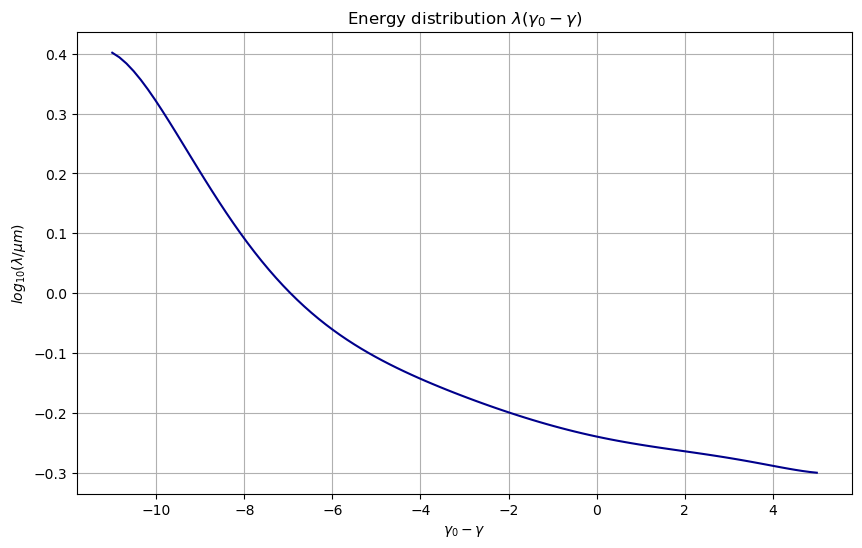

In [5]:
plt.figure(figsize=(10, 6))
x = np.linspace(-11,5,100)
y = log10lambda(x)
plt.plot(x, y, label='Line', color='darkblue')
plt.grid(True, which='both')
plt.xlabel('$\gamma_0-\gamma$') 
plt.ylabel('$log_{10}(\lambda / \mu m)$') 
plt.title('Energy distribution $\lambda (\gamma_0-\gamma)$') # Replace with an appropriate title
plt.show()


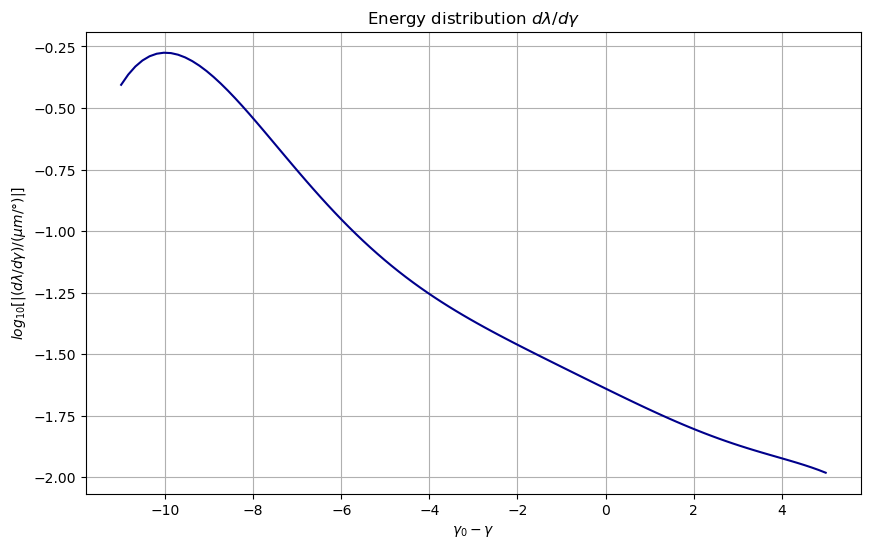

In [6]:
plt.figure(figsize=(10, 6))
x = np.linspace(-11,5,100)
y = log10dlambda_dgamma(x)
plt.plot(x, y, label='Line', color='darkblue')
plt.grid(True, which='both')
plt.xlabel('$\gamma_0-\gamma$') 
plt.ylabel('$log_{10}[|(d \lambda / d \gamma) /(\mu m/°)|]$') 
plt.title('Energy distribution $d \lambda / d \gamma$') # Replace with an appropriate title
plt.show()


#### Conversion from $\gamma$ and $I$ to $\lambda$ and $C\cdot E$ 

<span style='color:darkcyan'> <i>Define the functions for the following calculations:</i></span>

<div class="alert alert-block alert-info">
    <b>Tip:</b> You will store the values for $\gamma$ in an uarray. If you want to perform mathematical operations on it, you will have to do it element by element. <br/>
    To see how this can be done in python, take a look at the calculation of $\gamma_0-\gamma$ below.

#### <span style='color:darkcyan'> Your functions: </span>

In [7]:
#----------------------------------------------
# Calculation of gamma0-gamma (here as an example):
#----------------------------------------------

def gamma_diff(gamma0, gamma): 
    # 'gamma0' is a (u)float, but gamma is a (u)array -> the calculation must be done
    # for each element of 'gamma' seperately
    diff = [] # create an empty array 'diff'
    for i in range(len(gamma)): 
        diff.append(gamma0 - gamma[i]) # for each element i from 'gamma' add an element to 'diff', 
                                       # that has the value (gamma0 - gamma[i])
    return diff

#----------------------------------------------
# calculate log(lambda)
#----------------------------------------------

# your function ... 


#----------------------------------------------    
# calculation of lambda
#----------------------------------------------

# your function ... 


#----------------------------------------------
# calculation of log(|dlambda/dgamma|)
#----------------------------------------------

# your function ... 


#----------------------------------------------
# calculation of dlambda/dgamma
#----------------------------------------------

# your function ... 


#----------------------------------------------
# calculation of C*E
#----------------------------------------------

# your function ... 




In [8]:
# further functions (if needed)

<div class="alert alert-block alert-info">
    <b>Tip</b>: <br/>
    1) Here is the place to <b>define all the functions you need</b> in this notebook. This helps to keep your notebook clear and structured.<br/>
    2) Add <b>comments</b> to your functions (e.g. what is the function good for, what happens in each line, etc.), so that you and your lab partner will still be able to understand the code at a later time.

<div style="padding:8px 0 8px 15px;border-left:3px solid #B51F1F;background-color:#F3F3F3;">
    <b><font color="darkred">!! IMPORTANT !!</font></b> <br/>
    Instructions for getting good results: <br/>
    <b>Preparation day:</b> <br/>
    To test your code: Calculate $\lambda$ and $C \cdot E$ for an array of some exemplary data points using the functions you defined in the 'functions' section, following all the steps in the cell below.

In [17]:
# Choose some random data for the test:
gamma0 = ...  # ufloat (1 value)
gamma_test = ... # uarray of at least 2 values for gamma
I_test = ... # uarray of at least 2 values for I

# 1) calculate gamma0 - gamma

# 2) calculate log_10(lambda)

# 3) calculate lambda

# 4) calculate log_10(dlambda/dgamma)

# 5) calculate dlambda/dgamma

# 6) calculate C*E


## 3. Experiments

### 3.1 Experiment 1: Checking the calibration curve
<span style='color:indigo'> <i>By measuring the line spectrum of a mercury vapor lamp, the accuracy of the calibration curve of the spectrometer is checked. The wavelengths of the individual Hg lines are accurately known and indicated below.</i></span>

In [9]:
# literature values for lambda

lambda_yellow = 578.0      # [nm]
lambda_green = 546.0       # [nm]
lambda_infrared_1 = 1014.0 # [nm]
lambda_infrared_2 = 1367.0 # [nm]

lambda_theory = [lambda_yellow,lambda_green,lambda_infrared_1, lambda_infrared_2]

# print the values in a table

print('\nLiterature values for the wavelengths of the Hg lines:')
table_0 = [['yellow', 'green', 'infrared 1', 'infrared 2'], lambda_theory]
header_0 = ['color','wavelength [nm]']
precision_0 = [None,1]
Table(table_0, header_0, precision_0)


Literature values for the wavelengths of the Hg lines:
╒════════════╤═══════════════════╕
│ color      │   wavelength [nm] │
╞════════════╪═══════════════════╡
│ yellow     │               578 │
├────────────┼───────────────────┤
│ green      │               546 │
├────────────┼───────────────────┤
│ infrared 1 │              1014 │
├────────────┼───────────────────┤
│ infrared 2 │              1367 │
╘════════════╧═══════════════════╛


#### 3.1.1 Measurement data

In [10]:
#--------------------------------------------------------------------
# Example how to store your data:

# One data point stored in a ufloat
# variable = ufloat(measured_value, absolute_error) # [unit]
one_gamma = ufloat(20.33, 0.17) # [°]

# several data points combined into one (u)array
# array = unumpy.uarray([measured_value_1, measured_value_2, ...], [absolute_error_1, absolute_error_2, ...]) # [unit]
multiple_gammas = unumpy.uarray([20.33, 18.57, 23.10], [0.17, 0.34, 0.68]) # [°]
#--------------------------------------------------------------------


<span style='color:darkcyan'> <i>Start with the yellow Hg-line:<br/> 
    Identify the deflection angle $\gamma_0$ at which the intensity is maximal.</i></span>

In [11]:
# Location of the yellow Hg line:

gamma0 = ... # [unit]

<span style='color:darkcyan'> <i>Proceed in the same way for the remaining Hg-lines.</i></span>

<div class="alert alert-block alert-info">
    <b>Hint</b>: You can't see the infrared lines with your eyes. However, you can still measure the maxima in the intensity.<br/>
    The two infrared peaks are very broad, so <b>scan the entire spectrum</b> to be sure that you really find the right maxima!<br/>

In [12]:
# Location of the 4 spectral lines of the Hg lamp

gamma_Hg_1 = ... # [unit] (include gamma0 as 1st element in the array)

<div class="alert alert-block alert-info">
    <b>Tip</b>: Take care when choosing names for your variables - make sure that you <b>don't use the same name for different variables</b> (throughout the whole notebook!) <br/>
    If you measure the same quantity in more than one experiment, you can e.g. include the experiment number in the variable name to make it unique. <br/>
    <small>Otherwise the value of the variable will depend on the order in which you execute the cells, which may cause confusion and wrong results if you don't always execute them from top to bottom.</small><br/>

<span style='color:darkcyan'> <i>Print your data in a table (incl. errors and units).</i></span>

#### 3.1.2 Evaluation

<span style='color:darkcyan'> <i>Calculate the wavelengths $\lambda$ of the Hg-lines in three steps:<br/>
    1) Calculate the difference in the deflection angles $\gamma_0 - \gamma$ using the functions you defined in the section 'functions'.</i></span>

In [13]:
# gamma0-gamma

gamma_diff_1 = ...

<span style='color:darkcyan'> <i>
    2) Use the fit function for the calibration curve to calculate the logarithm of the wavelength from $\gamma_0 - \gamma$ for the Hg-lines you measured. </i></span>

In [14]:
# log(lambda)

log_lambda_1 = ...


<span style='color:darkcyan'> <i>
    3) Calculate the wavelength $\lambda from the logarithm (also with the corresponding function from above). </i></span>

In [15]:
# lambda

lambda_1 = ...


<span style='color:darkcyan'> <i>Fill in the table below with your results (don't forget the errors!).</i></span>

In [16]:
header_1 = ['color', 'gamma [unit]', 'gamma0-gamma [unit]', 'lambda_messung [unit]', 'lambda_theorie [unit]'] # Einheiten [] bitte ergänzen
table_1 = [['yellow', 'green', 'infrared 1', 'infrared 2'],
           [0,0,0,0], # gamma
           [0,0,0,0], # gamma0-gamma
           [0,0,0,0], # lambda
           lambda_theory]
precision_1 = [None,0,0,0,0] # replace 0 by adequate values

Table(table_1, header_1, precision_1)


╒════════════╤════════════════╤═══════════════════════╤═════════════════════════╤═════════════════════════╕
│ color      │   gamma [unit] │   gamma0-gamma [unit] │   lambda_messung [unit] │   lambda_theorie [unit] │
╞════════════╪════════════════╪═══════════════════════╪═════════════════════════╪═════════════════════════╡
│ yellow     │              0 │                     0 │                       0 │                     578 │
├────────────┼────────────────┼───────────────────────┼─────────────────────────┼─────────────────────────┤
│ green      │              0 │                     0 │                       0 │                     546 │
├────────────┼────────────────┼───────────────────────┼─────────────────────────┼─────────────────────────┤
│ infrared 1 │              0 │                     0 │                       0 │                    1014 │
├────────────┼────────────────┼───────────────────────┼─────────────────────────┼─────────────────────────┤
│ infrared 2 │              

<div class="alert alert-block alert-info">
    <b>Attention!</b> Take care of the <b>units</b> for $\lambda$!

<span style='color:darkcyan'> <i>Compare your results with the literature values: <br/>
    Do they agree? Is the deviation smaller than the error of your measurement?</i></span>

### 3.2 Experiment 2: Spectral distribution of a Halogen or Thungsten lamp
<span style="color: indigo;"><i>
        Measure and plot the spectral energy distribution of either a halogen or a thungsten lamp at 3 different temperatures. </i>
</span>


For exercise 3 you will have to determine the $\gamma$ for which $C\cdot E$ is maximal from your spectral energy distribution plots. 
    However, the quantities you measure are the intensity $I$ and the deflection angle $\gamma$. <br/>
    Those quantities <b>do NOT transform linearly</b> into each other, but via the rather complicated calibration curves. <b>Therefore, the angle at which you measure the maximum intensity $I$ will not be to the angle at which $C\cdot E$ is maximal!</b>  
      
__To make sure that you don't miss the $C\cdot E$ maximum, perform your measurements in the folloeing steps:__  
    1. Scan through the entire spectrum in coarse steps.  
    2. Calculate $\lambda$ and $C\cdot E$, print your data in a table and plot $C\cdot E$ in dependence of $\lambda$ (step 1 and 2 in 'Evaluation').   
    3. Look for the maximum for $C\cdot E$. If there is no clear maximum in your plot, it may be outside the range you have measured and you will have to collect more data for smaller/larger $\gamma$.  
    4. If you found the maximum, collect more data point around the maximum and repeat step 2 (you only have to re-run the corresponding cells). This is the interesting region! You will need them to determine the exact location of the maximum. Further away from the maximum you don't need that many data points - just enough to have a nice plot of the spectral density distribution.

#### 3.2.1  Measurement data

<span style='color:darkcyan'> <i>Measure the intesity $I$ for different deflection angles $\gamma$ for three different voltages.</i></span>

In [18]:

# Lamp used: .........

# Measured values for deflection angle and intensity for 3 different voltages.

#Measurement1:
Voltage1 = ... # [unit]
gamma_U1 = ... # [unit]
intensity_U1 = ... # [unit]

#Measurement 2:
Voltage2 = ... # [unit]
gamma_U2 = ... # [unit]
intensity_U2 = ... # [unit]

# Measurement 3:
Voltage3 = ... # [unit]
gamma_U3 = ... # [unit]
intensity_U3 = ... # [unit]

#### 3.2.2 Evaluation

<span style='color:darkcyan'> <i>Calculate $\lambda$ and $C \cdot E$ for the three different voltages.</i></span>

<span style='color:darkcyan'> <i>Fill in the table below with your results (don't forget the errors!).</i></span>

In [19]:
#-----------------------------------------------------
# Voltage 1
#-----------------------------------------------------

header_21 = ['gamma [unit]', 'gamma0-gamma [unit]', 'lambda [unit]', 'I [unit]', 'C E [unit]'] 
table_21 = [[], 
           [], 
           [], 
           [],
           [],
           ]
precision_21 = [0,0,0,0,0] # replace 0 by adequate values

Table(table_21, header_21, precision_21)

#-----------------------------------------------------
# Voltage 2
#-----------------------------------------------------

# table


#-----------------------------------------------------
# Voltage 3
#-----------------------------------------------------

# table


╒════════════════╤═══════════════════════╤═════════════════╤════════════╤══════════════╕
│ gamma [unit]   │ gamma0-gamma [unit]   │ lambda [unit]   │ I [unit]   │ C E [unit]   │
╞════════════════╪═══════════════════════╪═════════════════╪════════════╪══════════════╡
╘════════════════╧═══════════════════════╧═════════════════╧════════════╧══════════════╛


<span style='color:darkcyan'> <i>Plot $CE$ in dependence of $\lambda$.</i></span>

<div class="alert alert-block alert-info">
    <b>Hint</b>: You can display all three curves in  the same plot with different colors. Use <code>plt.scatter()</code> (not <code>plt.plot()</code>), especially if your data arrays are not sorted by increasing x-values (<code>plt.scatter()</code> shows only dots and does not connect the data points).<br/>

In [20]:
# plot

### 3.3 Exercise 3: Wien's displacement law
<span style="color: indigo;"><i>
        Can you observe the Wien’s displacement law in your spectral energy distributions? Determine the temperatures of the glowing point from the wavelengths of the energy maxima, which to a large extent fulfill the condition that the halogen lamp is a gray emitter.</i>
</span>


<span style='color:darkcyan'> <i>Determine $\lambda_\max$ for each voltage from the spectral energy distribution curves. .</i></span>

In [21]:
lambda_max = ...

<span style='color:darkcyan'> <i>Calculate the corresponding temperature.</i></span>

In [22]:
T = ...

<span style='color:darkcyan'> <i>Create a table with your data. What can you observe? Describe it in the markdown below. </i></span>

In [23]:
# table

## 4 Discussion

<span style='color:darkcyan'> <i>Are your results realistic? Why (not)? Comparison with theory? </i></span>

<span style='color:darkcyan'> <i>What measurement errors were assumed? Why? <br/>
    What are the main reasons for the errors in your results and how do they come about?</i></span>

<span style='color:darkcyan'> <i>How would you try to reduce the error further? Could you improve the accuracy of the experiment? </i></span>

<span style='color:darkcyan'> <i>If you were to repeat the experiment, what would you do differently and why?</i></span>